# S2.02 - Notebook n°2

## Partie 2 - Recherche de plus court chemin

### BERHO Andoni
### BOURCIEZ Maxime
### TD II - TP 3

#### Algorithmes de recherche des plus courts chemins

# I - Importation des données

In [102]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time


# os.chdir("C:\\IUT\\Semestre 2\\S2.02 - Explo algorithmique d'un problème\\partie2") # Pc portable Maxime
# os.chdir("E:\\Cours\\Semestre2\\S2.02\\S2.02-Explo.-d-un-pb.-algo\\partie2") # PC Home Maxime
# Le pc d'Andoni n'a pas besoin de chemin d'accès spécifié

# import dicsucc.json et dicsuccdist.json (--> dictionnaire)
with open("dicsucc.json", "r") as fichier:
    dicsucc = json.load(fichier)
with open("dicsuccdist.json", "r") as fichier:
    dicsuccdist = json.load(fichier)

# import aretes.csv (--> dataframe) et transformation de lstpoints (chaîne-->liste)
aretes = pd.read_table('aretes.csv', sep  =';', index_col= 0)

for ind in aretes.index :
    ls = aretes.loc[ind,'lstpoints'].replace(" ","").replace("]", "").replace("[", "").split(',')
    lst = []
    for val in ls :
        lst.append(int(val))
    aretes.at[ind,'lstpoints'] = lst


# import sommets.csv, matrice_poids.csv (--> dataframe)
sommets = pd.read_table('sommets.csv', sep  =';', index_col= 0)
matrice_poids = pd.read_csv('matrice_poids.csv', sep = ';', index_col = 0)
sommets['indice'] = [i for i in range(len(sommets.index))]

# transformation dataframe matrice des poids en tableau    
tableau_poids = np.array(matrice_poids)

# transformation matrice des poids en liste de listes
liste_poids = [[None for j in range(len(tableau_poids))] for i in range(len(tableau_poids))]
for i in range(len(tableau_poids)):
    for j in range(len(tableau_poids)):
        liste_poids[i][j]  = tableau_poids[i,j]


del fichier, i, j, val, ls, lst, ind 

# II - Fonctions nécessaires

### A) Transformation du graphe 

In [103]:
def transformer_graphe(graphe):
    """ Le graphe d'origine incluait des clés en string, et nous préférons par simplicité les transformer en entier.
        De plus, les valeurs du dictionnaire d'origine étaient des listes de listes, et nous préférons, pour manipuler, des dictionnaires.
        Cette fonction transforme le dictionnaire dans la forme que nous le voulons"""
    nouveau_graphe = {}
    # On itère sur les sommet (et leurs successeurs)
    for sommet_str, voisins in graphe.items():
        sommet_int = int(sommet_str)     # Transformation de la clé
        nouveau_graphe[sommet_int] = {}  # Création du couple clé-valeur dans le nouveau dictionnaire
        for voisin, poids in voisins:
            nouveau_graphe[sommet_int][voisin] = poids  # Ajout dans le dictionnaire du voisins le poid de l'arc
    return nouveau_graphe

graphe_transforme = transformer_graphe(dicsuccdist)

### B) Reconstituer le chemin (pour Dijkstra & bellman)

In [104]:
def reconstituer(pred, dep, arr):
    chemin = []
    sommet = arr
    while sommet != dep:
        chemin.insert(0, sommet)
        sommet = pred[sommet]
    chemin.insert(0, dep)

    return chemin

### C) Distance GPS

In [105]:
import math
from math import acos,asin,cos,sin,pi

def distanceGPS(latA, latB, lonA, lonB):
    pi = math.pi
    sin = math.sin
    cos = math.cos
    acos = math.acos
    
    # Conversions des latitudes en radians
    ltA = latA / 180 * pi
    ltB = latB / 180 * pi
    loA = lonA / 180 * pi
    loB = lonB / 180 * pi
    
    # Rayon de la terre en mètres 
    RT = 6378137
    
    # angle en radians entre les 2 points
    S = acos(round(sin(ltA) * sin(ltB) + cos(ltA) * cos(ltB) * cos(abs(loB - loA)), 14))
    
    # distance entre les 2 points, comptée sur un arc de grand cercle
    return S * RT

### D) Echange indice/indetifiant et vice-versa

In [106]:
listesommets = list(matrice_poids.index)

def indice(som) :
    return(listesommets.index(som))

def nomsom(indice) :
    return(listesommets[indice])

# III - Algorithme de dijkstra

In [107]:
def dijkstra(graphe, depart, arrivee):
    # Initialisation
    distances = {sommet: float('inf') for sommet in graphe}
    distances[depart] = 0
    predecesseurs = {}
    non_traites = set(graphe.keys())

    while non_traites:
        # Sélectionner le sommet non traité avec la plus petite distance
        sommet_courant = min(non_traites, key=lambda sommet: distances[sommet])
        non_traites.remove(sommet_courant)

        if sommet_courant == arrivee:
            break  # On a trouvé le chemin le plus court

        for voisin, poids in graphe[sommet_courant].items():  # On itère sur les voisins
            # Calculer la nouvelle distance
            nouvelle_distance = distances[sommet_courant] + poids

            # Vérifier si la nouvele distance est meilleure
            if nouvelle_distance < distances[voisin]:
                distances[voisin] = nouvelle_distance
                predecesseurs[voisin] = sommet_courant

    # Reconstruction du chemin le plus court
    chemin = reconstituer(predecesseurs, depart, arrivee)
    poids_total = distances[arrivee]
    
    return (chemin, poids_total)
    
# Lancement du chrono
startDijkstra = time.time()

cheminDijkstra = dijkstra(graphe_transforme, 1806175538, 1801848709)
print("Chemin trouvé par l'algorithme de Dijkstra : ", cheminDijkstra[0], "\n",
      "\n",
      "Poid du chemin : ", cheminDijkstra[1],"\n")

endDijkstra = time.time()
tempsDijkstra = endDijkstra - startDijkstra
print("Temps d'exécution = ", tempsDijkstra) 

Chemin trouvé par l'algorithme de Dijkstra :  [1806175538, 1806175499, 1806175395, 3651250505, 6285616022, 5487073241, 7670962642, 5487073237, 7670962641, 6480663685, 7260687853, 1888303681, 1888303632, 1888303638, 1888303631, 6480663689, 6480663688, 6480663690, 7667113679, 1890041708, 6349193177, 2290806513, 5487050076, 255402681, 255402680, 388382259, 388382267, 255402703, 388382278, 388382282, 364414737, 1801848709] 
 
 Poid du chemin :  757.8000000000002 

Temps d'exécution =  0.07207083702087402


# IV - Algorithme de Belmann

In [108]:
def bellman_ford(graphe, depart, arrivee):
    # Initialisation
    distances = {sommet: float('inf') for sommet in graphe}
    distances[depart] = 0
    predecesseurs = {}

    # Nombre de sommets dans le graphe
    nb_sommets = len(graphe)

    # Relaxation des arêtes
    for _ in range(nb_sommets - 1):
        for sommet in graphe:
            for voisin, poids in graphe[sommet].items():
                if distances[sommet] + poids < distances[voisin]:
                    distances[voisin] = distances[sommet] + poids
                    predecesseurs[voisin] = sommet

    # Détection de cycle négatif
    for sommet in graphe:
        for voisin, poids in graphe[sommet].items():
            if distances[sommet] + poids < distances[voisin]:
                return "Cycle négatif détecté"

    # Reconstruction du chemin le plus court
    chemin = reconstituer(predecesseurs, depart, arrivee)
    poids_total = distances[arrivee]
    
    return (chemin, poids_total)

# Lancement du chrono
startBellman = time.time()

cheminBellman = bellman_ford(graphe_transforme, 1806175538, 1801848709)
print("Chemin trouvé par l'algorithme de Bellman : ", cheminBellman[0], "\n",
      "\n",
      "Poid du chemin : ", cheminBellman[1], "\n")

endBellman = time.time()
tempsBellman = endBellman - startBellman
print("Temps d'exécution = ", tempsBellman) 

Chemin trouvé par l'algorithme de Bellman :  [1806175538, 1806175499, 1806175395, 3651250505, 6285616022, 5487073241, 7670962642, 5487073237, 7670962641, 6480663685, 7260687853, 1888303681, 1888303632, 1888303638, 1888303631, 6480663689, 6480663688, 6480663690, 7667113679, 1890041708, 6349193177, 2290806513, 5487050076, 255402681, 255402680, 388382259, 388382267, 255402703, 388382278, 388382282, 364414737, 1801848709] 
 
 Poid du chemin :  757.8000000000002 

Temps d'exécution =  1.4884939193725586


# V - Algorithme de Floyd-Warshall

### A) Algorithme

In [109]:
def floyd_warshall(matricePonderee):
    taille = len(matricePonderee)
    
    # Remplissage de M0 et P0
    M = np.array(matricePonderee)
    P = np.full((taille, taille), -1, dtype=int)
    
    for i in range(taille):
        for j in range(taille):
            if M[i][j] != 0 and i != j:
                P[i][j] = i
            else:
                P[i][j] = -1  # Utilisation de -1 pour indiquer aucun prédécesseur
    start = time.time()
    
    # Début des itérations des lignes et colonnes
    for k in range(taille):       
        for i in range(taille):
            for j in range(taille):
                # Relâchement
                if M[i][k] + M[k][j] < M[i][j]:
                    M[i][j] = M[i][k] + M[k][j]
                    P[i][j] = P[k][j]
        currentTime = time.time()
        
        print ("étape ", k, " terminée || temps : ", currentTime - start)
    
    return M, P

Nous avons exécuté la fonction dans le but d'enregister les matrices M et P dans des fichiers CSV. 

L'exécution de la fonction a duré 3369 secondes, soit 56 minutes et 9 secondes.

Voici ci-dessous l'enregistrement des matrices en fichiers CSV (à décommenter pour exécuter) :

In [110]:
'''
M_original, P_original = floyd_warshall(matrice_poids)

# Convertir les matrices NumPy en DataFrame
df_M = pd.DataFrame(M_original)
df_P = pd.DataFrame(P_original)

# Sauvegarder les DataFrame dans des fichiers CSV
df_M.to_csv("M.csv", index=False, header=False)
df_P.to_csv("P.csv", index=False, header=False)
'''

'\nM_original, P_original = floyd_warshall(matrice_poids)\n\n# Convertir les matrices NumPy en DataFrame\ndf_M = pd.DataFrame(M_original)\ndf_P = pd.DataFrame(P_original)\n\n# Sauvegarder les DataFrame dans des fichiers CSV\ndf_M.to_csv("M.csv", index=False, header=False)\ndf_P.to_csv("P.csv", index=False, header=False)\n'

Voici ci-dessous l'importation des matrices depuis les fichiers CSV, afin de vérifier les données obtenues :

In [111]:
# Lire les DataFrame depuis les fichiers CSV
df_M_loaded = pd.read_csv("M.csv", header=None)
df_P_loaded = pd.read_csv("P.csv", header=None)

# Convertir les DataFrame en matrices NumPy
M = df_M_loaded.values
P = df_P_loaded.values

### B) Reconstitution du chemin

In [112]:
def reconstituerFW(dep, arr):
    # Récupération de M et P
    global M, P
    
    # Initialisation des variables
    chemin = []
    sommet = indice(arr)
    
    # Reconstitution du chemin
    while sommet != indice(dep):
        chemin.insert(0, nomsom(sommet))
        sommet = P[indice(dep)][sommet]
    chemin.insert(0, dep)
    
    # Retourne le chemin reconstitué et le poid du chemin
    return (chemin, M[indice(dep)][indice(arr)])

# Lancement du chrono
startFloydWarshall = time.time()

cheminFW = reconstituerFW(1806175538, 1801848709)
print("Chemin trouvé par l'algorithme de Floyd-Warshall : ", cheminFW[0], "\n",
      "\n",
      "Poid du chemin : ", cheminFW[1], "\n")

endFloydWarshall = time.time()
tempsFloydWarshall = endFloydWarshall - startFloydWarshall
print("Temps d'exécution = ", tempsFloydWarshall) 

Chemin trouvé par l'algorithme de Floyd-Warshall :  [1806175538, 1806175499, 1806175395, 3651250505, 6285616022, 5487073241, 7670962642, 5487073237, 7670962641, 6480663685, 7260687853, 1888303681, 1888303632, 1888303638, 1888303631, 6480663689, 6480663688, 6480663690, 7667113679, 1890041708, 6349193177, 2290806513, 5487050076, 255402681, 255402680, 388382259, 388382267, 255402703, 388382278, 388382282, 364414737, 1801848709] 
 
 Poid du chemin :  757.8 

Temps d'exécution =  0.0020003318786621094


# VI - Algorithme A*

In [113]:
def aetoile(graphe, depart, arrivee, sommets):
    # Récupérer les coordonnées de la destination
    latB = sommets.loc[arrivee, 'lat']
    lonB = sommets.loc[arrivee, 'lon']

    # Déclaration de la sous-fonction interne heuristique
    def heuristique(sommet):
        return distanceGPS(sommets.loc[sommet, 'lat'], latB, sommets.loc[sommet, 'lon'], lonB)
    
    # Initialisation des distances et des prédécesseurs
    g_score = {sommet: float('inf') for sommet in graphe}
    g_score[depart] = 0
    
    f_score = {sommet: float('inf') for sommet in graphe}
    f_score[depart] = heuristique(depart)
    
    open_set = {depart}
    came_from = {}
    distanceChemin = 0
    
    while open_set:
        # Sélectionner le sommet non traité avec le plus petit f_score
        sommet_courant = min(open_set, key=lambda sommet: f_score[sommet])
        
        if sommet_courant == arrivee:
            chemin = []
            sommet = arrivee
            while sommet != depart:
                chemin.append(sommet)
                sommet = came_from.get(sommet)
                distanceChemin += f_score[sommet]
                if sommet is None:
                    return []  # Return empty if there is no valid path
            chemin.append(depart)
            chemin.reverse()
            return (chemin, distanceChemin)
        
        open_set.remove(sommet_courant)
        
        for voisin, poids in graphe[sommet_courant].items():
            tentative_g_score = g_score[sommet_courant] + poids
            
            if tentative_g_score < g_score[voisin]:
                came_from[voisin] = sommet_courant
                g_score[voisin] = tentative_g_score
                f_score[voisin] = g_score[voisin] + heuristique(voisin)
                if voisin not in open_set:
                    open_set.add(voisin)
    
    return None

# Lancement du chrono
startAEtoile = time.time()

cheminAEtoile = aetoile(graphe_transforme, 1806175538, 1801848709, sommets)
print("Chemin trouvé par l'algorithme d'heuristique A* : ", cheminAEtoile[0], "\n",
      "\n",
      "Poid du chemin : ", cheminAEtoile[1], "\n",
      "\n",
      "On remarque que le chemin est différent que celui des autres algorithmes, et plus long.", "\n")

endAEtoile = time.time()
tempsAEtoile = endAEtoile - startAEtoile
print("Temps d'exécution = ", tempsAEtoile) 

Chemin trouvé par l'algorithme d'heuristique A* :  [1806175538, 1806175499, 1806175395, 3651250505, 6285616022, 5487073241, 7670962642, 5487073237, 7670962641, 6480663685, 7260687853, 1888303681, 1888303632, 1888303638, 1888303631, 6480663689, 6480663688, 6480663690, 7667113679, 1890041708, 6349193177, 2290806513, 5487050076, 255402681, 255402680, 388382259, 388382267, 255402703, 388382278, 388382282, 364414737, 1801848709] 
 
 Poid du chemin :  20887.07041062554 
 
 On remarque que le chemin est différent que celui des autres algorithmes, et plus long. 

Temps d'exécution =  0.006567239761352539


# VII - Visualisation des temps d'exécution

Pour mieux comparer les temps d'exécution des différents algorithmes que nous avons codés, nous avons décidé de les représenter dans un diagramme en barres : 

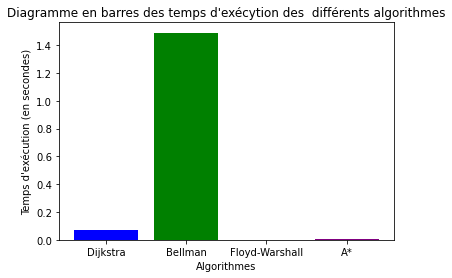

In [114]:
# Données à représenter
algorithmes = ["Dijkstra", "Bellman", "Floyd-Warshall", "A*"]
temps = [tempsDijkstra, tempsBellman, tempsFloydWarshall, tempsAEtoile]

# Création du diagramme en barres
plt.bar(algorithmes, temps, color = ['blue', 'green', 'red', 'purple'])

# Ajouter des étiquettes et des titres
plt.xlabel('Algorithmes')
plt.ylabel("Temps d'exécution (en secondes)")
plt.title("Diagramme en barres des temps d'exécytion des  différents algorithmes")

# Afficher le graphique
plt.show()

Attention : il convient de souligner que l'algorithme ici appelé "Floyd-Warshall" correspond à la fonction de reconstitution du chemin depuis les matrices M et P, issues elles de l'exécution du véritable algorithme de Floyd-Warshall, dont nous souhaitons rappeler ici que le temps d'exécution était de 56 minutes et 9 secondes.